<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/20_ImbalancedNeural_Network/Handling_Imbalanced_Dataset_Using_Cost_Sensitive_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
D:\Deep_Learning\cost_sensitive_Handling_Imbalanced_Classification_Using_NN\creditcard.csv.zip

<h1><b>Handling_Imbalanced_Dataset_Using_Cost_Sensitive_NN</b></h1>
these DL technique that can be used basically for use case of which has imbalanced dataset w.r.t output category.

## https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('D:\\Deep_Learning\\20_cost_sensitive_Handling_Imbalanced_Classification_Using_NN\\creditcard\\creditcard.csv', header=None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.columns = ["Time"] + ['V'+ str(i) for i in range(1,29)] + ['Amount', 'Class'] 

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

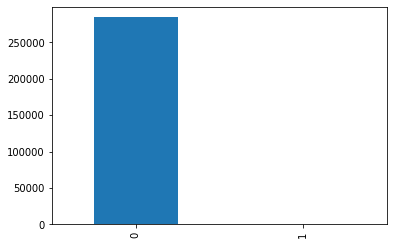

In [38]:
pd.value_counts(df['Class']).plot.bar()

### Intitially

* Step1 -We Will Create an ANN and solve this problem(ROC AUC) 

* Step2- We will use some Weights handling techniques to solve this imbalanced then we create
The ANN

In [39]:
len(df.columns)

31

In [42]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [48]:
##Step1
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [50]:
print(len(X.columns))
n_inputs=len(X.columns)

29


In [51]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=len(X.columns), activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 11s 1ms/step - loss: 0.0400
Epoch 2/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0130
Epoch 3/10
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0131
Epoch 4/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0133
Epoch 5/10
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0103
Epoch 6/10
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0091
Epoch 7/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0114
Epoch 8/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0092
Epoch 9/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0068
Epoch 10/10
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0081


In [52]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.9252985238781177


<h><b>Weighted Neural Network With Keras</b></h>

* Define Weights
* Fit the model with thos specific weights

In [53]:
weights_assigned={0:1,1:550}

In [54]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 10s 2ms/step - loss: 4.8931
Epoch 2/10
6231/6231 [==============================] - 9s 1ms/step - loss: 3.4170
Epoch 3/10
6231/6231 [==============================] - 9s 1ms/step - loss: 3.3011
Epoch 4/10
6231/6231 [==============================] - 9s 1ms/step - loss: 2.4263
Epoch 5/10
6231/6231 [==============================] - 9s 1ms/step - loss: 4.0582
Epoch 6/10
6231/6231 [==============================] - 9s 1ms/step - loss: 2.1683
Epoch 7/10
6231/6231 [==============================] - 9s 1ms/step - loss: 2.0487
Epoch 8/10
6231/6231 [==============================] - 10s 2ms/step - loss: 2.2760
Epoch 9/10
6231/6231 [==============================] - 9s 1ms/step - loss: 2.6476
Epoch 10/10
6231/6231 [==============================] - 9s 1ms/step - loss: 2.7287


In [55]:
y_pred=model.predict(X_test)

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test,y_pred)

0.9789893802246421